In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub

TensorFlow 2.x selected.


## Import Datasets

In [0]:
trainset=pd.read_csv('https://raw.githubusercontent.com/mohitprashant/CZ4041Classification/master/train.csv')
testset=pd.read_csv('https://raw.githubusercontent.com/mohitprashant/CZ4041Classification/master/test.csv')

In [3]:
trainset.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [0]:
#Feature Encoding
trainset.loc[trainset['bin_3']=='T','bin_3']=1
trainset.loc[trainset['bin_3']=='F','bin_3']=0

trainset.loc[trainset['bin_4']=='Y','bin_4']=1
trainset.loc[trainset['bin_4']=='N','bin_4']=0

trainset.loc[trainset['ord_1']=='Grandmaster','ord_1']=4
trainset.loc[trainset['ord_1']=='Master','ord_1']=3
trainset.loc[trainset['ord_1']=='Expert','ord_1']=2
trainset.loc[trainset['ord_1']=='Contributor','ord_1']=1
trainset.loc[trainset['ord_1']=='Novice','ord_1']=0

trainset.loc[trainset['ord_2']=='Lava Hot','ord_2']=5
trainset.loc[trainset['ord_2']=='Boiling Hot','ord_2']=4
trainset.loc[trainset['ord_2']=='Hot','ord_2']=3
trainset.loc[trainset['ord_2']=='Warm','ord_2']=2
trainset.loc[trainset['ord_2']=='Cold','ord_2']=1
trainset.loc[trainset['ord_2']=='Freezing','ord_2']=0

for i in range(len(trainset)):
  trainset.at[i,'ord_3']=ord(trainset.at[i,'ord_3'])-97

for i in range(len(trainset)):
  trainset.at[i,'ord_4']=ord(trainset.at[i,'ord_4'])-65

import string

asc=string.ascii_letters

for i in range(len(trainset)):
  one=asc.index(trainset.at[i,'ord_5'][0])
  two=asc.index(trainset.at[i,'ord_5'][1])
  trainset.at[i,'ord_5']=one*52+two

l0=trainset.nom_0.unique().tolist()
for i in range(len(trainset)):
  trainset.at[i,'nom_0']=l0.index(trainset.at[i,'nom_0'])

l1=trainset.nom_1.unique().tolist()
for i in range(len(trainset)):
  trainset.at[i,'nom_1']=l1.index(trainset.at[i,'nom_1'])

l2=trainset.nom_2.unique().tolist()
for i in range(len(trainset)):
  trainset.at[i,'nom_2']=l2.index(trainset.at[i,'nom_2'])

l3=trainset.nom_3.unique().tolist()
for i in range(len(trainset)):
  trainset.at[i,'nom_3']=l3.index(trainset.at[i,'nom_3'])

l4=trainset.nom_4.unique().tolist()
for i in range(len(trainset)):
  trainset.at[i,'nom_4']=l4.index(trainset.at[i,'nom_4'])



In [0]:
testset.loc[testset['bin_3']=='T','bin_3']=1
testset.loc[testset['bin_3']=='F','bin_3']=0

testset.loc[testset['bin_4']=='Y','bin_4']=1
testset.loc[testset['bin_4']=='N','bin_4']=0

testset.loc[testset['ord_1']=='Grandmaster','ord_1']=4
testset.loc[testset['ord_1']=='Master','ord_1']=3
testset.loc[testset['ord_1']=='Expert','ord_1']=2
testset.loc[testset['ord_1']=='Contributor','ord_1']=1
testset.loc[testset['ord_1']=='Novice','ord_1']=0

testset.loc[testset['ord_2']=='Lava Hot','ord_2']=5
testset.loc[testset['ord_2']=='Boiling Hot','ord_2']=4
testset.loc[testset['ord_2']=='Hot','ord_2']=3
testset.loc[testset['ord_2']=='Warm','ord_2']=2
testset.loc[testset['ord_2']=='Cold','ord_2']=1
testset.loc[testset['ord_2']=='Freezing','ord_2']=0

for i in range(len(testset)):
  testset.at[i,'ord_3']=ord(testset.at[i,'ord_3'])-97

for i in range(len(testset)):
  testset.at[i,'ord_4']=ord(testset.at[i,'ord_4'])-65

for i in range(len(testset)):
  one=asc.index(testset.at[i,'ord_5'][0])
  two=asc.index(testset.at[i,'ord_5'][1])
  testset.at[i,'ord_5']=one*52+two

## Visualizing Cyclical Data

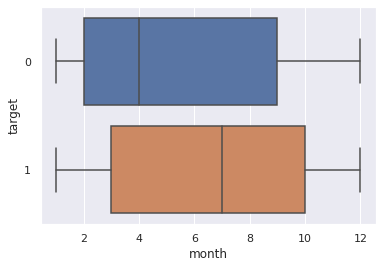

In [6]:
sb.boxplot(x="month", y="target", data=trainset, orient="h")

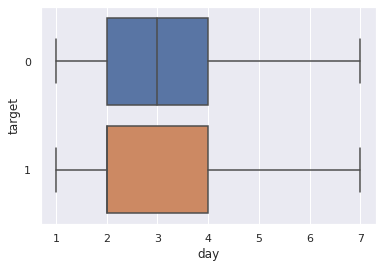

In [7]:
sb.boxplot(x="day", y="target", data=trainset, orient="h")

## Visualizing Ordinal Data

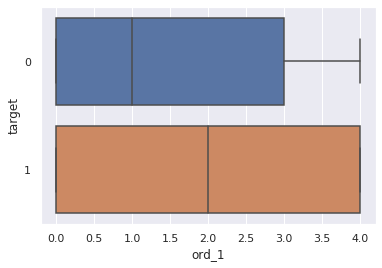

In [8]:
sb.boxplot(x="ord_1", y="target", data=trainset, orient="h")

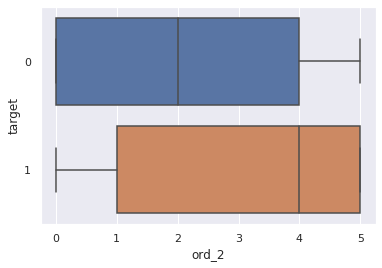

In [9]:
sb.boxplot(x="ord_2", y="target", data=trainset, orient="h")

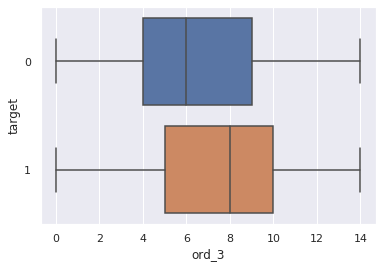

In [10]:
sb.boxplot(x="ord_3", y="target", data=trainset, orient="h")

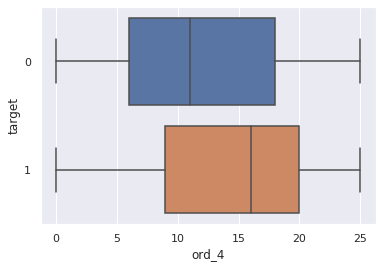

In [11]:
sb.boxplot(x="ord_4", y="target", data=trainset, orient="h")

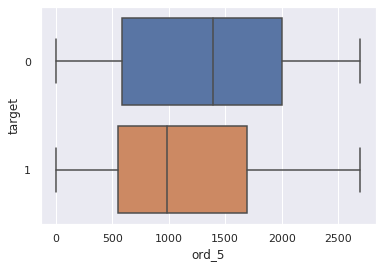

In [12]:
sb.boxplot(x="ord_5", y="target", data=trainset, orient="h")

## Visualizing Binary Data

In [0]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(trainset['bin_0'], trainset['target'])

array([[181786,  79963],
       [ 26450,  11801]])

In [15]:
confusion_matrix(trainset['bin_1'], trainset['target'])

array([[149434,  73584],
       [ 58802,  18180]])

In [16]:
confusion_matrix(trainset['bin_2'], trainset['target'])

array([[129238,  55795],
       [ 78998,  35969]])

In [17]:
confusion_matrix(trainset['bin_3'], trainset['target'])

array([[101151,  45314],
       [107085,  46450]])

In [18]:
confusion_matrix(trainset['bin_4'], trainset['target'])

array([[ 72197,  36170],
       [136039,  55594]])

## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y=pd.DataFrame(trainset['target'])
X=pd.DataFrame(trainset[['bin_0','bin_1','bin_2','bin_3','bin_4','ord_0','ord_1','ord_2','ord_3','ord_4','ord_5','nom_0','nom_1','nom_2','nom_3','nom_4']])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.1)

dectree=DecisionTreeClassifier(min_samples_split=250)
dectree.fit(X_train, y_train)

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [20]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7370888888888889


In [21]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7171333333333333


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

y=pd.DataFrame(trainset['target'])
X=pd.DataFrame(trainset[['bin_0','bin_1','bin_2','bin_3','bin_4','ord_0','ord_1','ord_2','ord_3','ord_4','ord_5','nom_0','nom_1','nom_2','nom_3','nom_4']])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.1)

forest=RandomForestClassifier(max_depth=20,n_jobs=-1)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [74]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", forest.score(X_train, y_train))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9865148148148148


In [75]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", forest.score(X_test, y_test))

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7268333333333333
